# Green Bank 2018 Instructions 

###### Chelsey McMichael

# Repeating Signals

When seeing signals that seem to be repeating throughout unrelated wappfiles, it is best to determine whether or not this is a known signal based off of the magnitude of the frequency of this signal. Use http://www.naic.edu/%7Ephil/rfi/rfilist.html if there is a peculiar signal that is found in multiple wappfiles. For instance, in the first single wappfile of slice 35, there is a huge signal around 1388 MHz. The list of this page gives information such as the frequency range, the date of the signal, and a comment referring to the signal. The 1388 MHz signal is described as a beeper harmonic. There is also a signal seen multiple times in board 1 with a frequency of about 1417.5 MHz, the website states that this is rfi from color cameras in the dome.

# Analysis

In [21]:
#import needed modules - add any additional modules here (or as needed in code)
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
import pylab 
%matplotlib inline 

In [22]:
#Read in the data to be used. Filenames should be changed to *your* filenames
#The APPSS data is a .csv created from exporting from Google Sheet
data_appss=ascii.read("slice_35_new.csv")  #APPSS data 
data_alf=ascii.read("alf_data.csv")    #ALFALFA data
data_agc=ascii.read("AGC_CAT.csv") # AGC catalog from UAT Page 

In [23]:
#Here we are creating RA and DEC values for each entry in the APPSS data
#You can skip this if you already have the RA/DEC values for the APPSS sources (but check for dependencies)

str_src_name=data_appss[1][:] #srcname columm, [1] shows what column we are pulling data from 

ra_hrdeg = list(str_src_name)   #these six lines convert these values into a list
ra_mindeg = list(str_src_name)
ra_secdeg = list(str_src_name)
dec_degdeg = list(str_src_name)
dec_mindeg = list(str_src_name)
dec_secdeg = list(str_src_name)

#for loop to convert the RA and DEC strings from csv into float RA/DEC (in decimal degrees)
for i in range(len(ra_hrdeg)):

    #convert RA to decimal degrees
    ra_hrdeg[i] = float(str_src_name[i][1:3])*15. #take portion of name that contains hr.
    ra_mindeg[i] = float(str_src_name[i][3:5])*15./60. #take portion that contains min.
    ra_secdeg[i] = float(str_src_name[i][5:9])*15./3600. #take portion that contains sec.
    #convert DEC to decimal degrees 
    dec_degdeg[i] = float(str_src_name[i][10:12]) #take portion that contains deg.
    dec_mindeg[i] = float(str_src_name[i][12:14])/60. #take portion that contains amin.
    dec_secdeg[i] = float(str_src_name[i][14:])/3600. #take portion that contains asec.
    
ra_deg=np.add(np.add(ra_hrdeg,ra_mindeg),ra_secdeg) #add each contribution to get RA in deg.
dec_deg=np.add(np.add(dec_degdeg, dec_mindeg), dec_secdeg) #add each contribution to get DEC in deg.

for i in range(len(ra_deg)): #keep it in this range where the RA is positive and negative
    if ra_deg[i] > 180.:
        ra_deg[i] = ra_deg[i]-360. 
        
#now that it is converted into decimal degrees, we can use it to make different graphs 

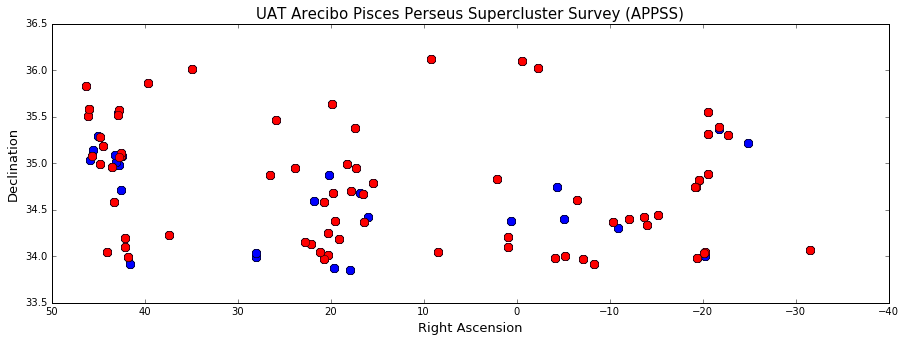

In [24]:
v_sys=data_appss['Vsys'] #create a new variable for the velocity data from the slice

#These 'good' values are defined as having systemic velocities greater than 0 km/s (0 km/s is nondetection)
good_v_sys= v_sys[(v_sys > 0)]
good_ra= ra_deg[(v_sys > 0)]
good_dec= dec_deg[(v_sys > 0)]
nd_ra_appss = ra_deg
nd_dec_appss = dec_deg

#plots the detections vs. nondetections of your slice as a scatter plot
plt.figure(figsize=(15,5)) #this figsize gives the traditional RA vs DEC dimensions of a graph
plt.gca().invert_xaxis()  #flip x axis 
plt.plot(ra_deg,dec_deg,'bo', markersize=8.5) #list x, y variables, blue cirlces are nondetections
plt.plot(good_ra,good_dec,'ro',markersize=8.5) #red circles define detection, markersize makes the dots larger
plt.title("UAT Arecibo Pisces Perseus Supercluster Survey (APPSS)", fontsize= 15) #title and font size
plt.xlabel("Right Ascension", fontsize=13) #label x axis
plt.ylabel("Declination", fontsize=13)   #label y axis

fig1 = plt.gcf() #define the figure so that you can save it 


#fig1.savefig('just_appss.pdf') #uncomment this so that you can have it save 

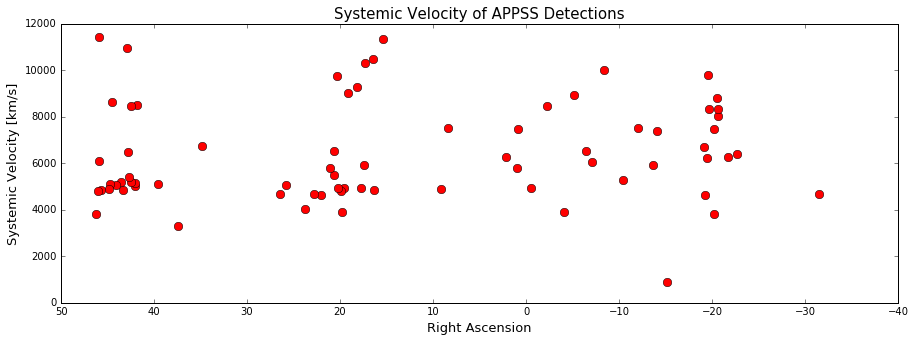

In [25]:
#plots the nonzero velocities of your slice vs the right ascension as a scatter plot for figure 2
plt.figure(figsize=(15,5))
plt.gca().invert_xaxis()
plt.plot(good_ra,good_v_sys,'ro', markersize= 8.5) #these are all detections and their calculated systemic velocity
plt.title("Systemic Velocity of APPSS Detections", fontsize= 15)
plt.xlabel("Right Ascension", fontsize=13)
plt.ylabel("Systemic Velocity [km/s]", fontsize=13)

fig2 = plt.gcf()
#fig2.savefig('RA_vs_Vsys.pdf') #uncomment this so that you can have it save 

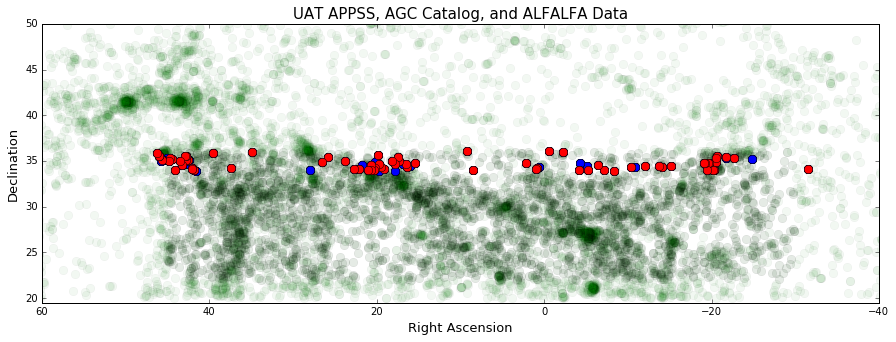

In [26]:
#read in the alfalfa data
RA_alf=data_alf["wrapradeg"] 
Dec_alf=data_alf["usedecdeg"]

#make sure to pull data that corresponds to your slice range!
#you can always change these values to make it correspond to your slice
#ALFALFA catalog consists of a wide range of declinations 
good_dec_alf= Dec_alf[(Dec_alf >= 33.5) & (Dec_alf <= 36.5)] 
good_ra_alf = RA_alf[(Dec_alf >= 33.5) & (Dec_alf <= 36.5)]

#read in the AGC catalog RA and DEC
RA_agc=data_agc["rawrap"] 
Dec_agc=data_agc["decdeg"]

#read in the AGC values in your correct declination range
good_dec_agc= Dec_agc[(Dec_agc >= 33.5) & (Dec_agc <= 36.5)] 
good_ra_agc= RA_agc[(Dec_agc >= 33.5) & (Dec_agc <= 36.5)]

#plots the RA and DEC of ALFALFA and AGC compared to the RA and DEC of your slice
plt.figure(figsize=(15,5))
plt.gca().invert_xaxis()
plt.plot(RA_agc, Dec_agc, 'go',markersize = 8.5, alpha =.05) #alpha changes transparency of each point 
plt.plot(RA_alf, Dec_alf, 'ko',markersize = 8.5, alpha =.05)
plt.plot(nd_ra_appss,nd_dec_appss,'bo', markersize=8.5) #blue circles consist of nondetections
plt.plot(good_ra,good_dec,'ro', markersize = 8.5) #red circles define detection


plt.title("UAT APPSS, AGC Catalog, and ALFALFA Data", fontsize= 15)
plt.xlabel("Right Ascension", fontsize=13)
plt.ylabel("Declination", fontsize=13)
pylab.ylim([19.5,50]) #change range on the y axis to include mostly our slice
pylab.xlim([60, -40]) #change range on the x axis to include mostly our slice
fig3 = plt.gcf()

#fig3.savefig('APPSS_AGC.pdf')  #uncomment this so that you can have it save 

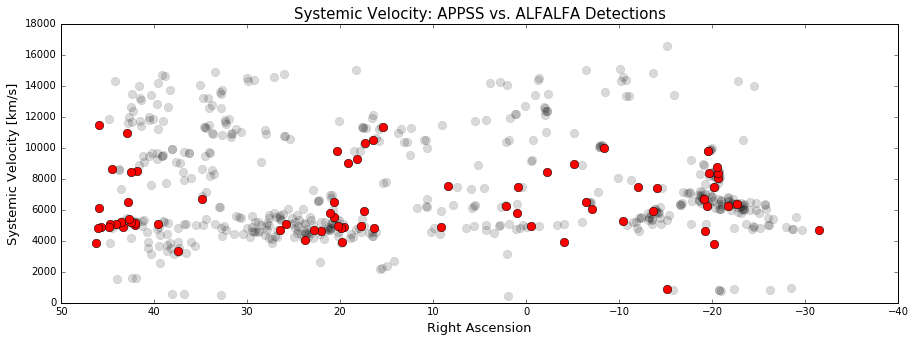

In [27]:
#read in the velocity data from ALFALFA
v_alf = data_alf['Vhelio']

#make sure the velocity used is only for the range of you slice, so you aren't overloaded w/ data you don't need
good_v_alf = v_alf[(Dec_alf >= 33.5) & (Dec_alf <= 36.5)]

#takes the RA of both the ALFALFA and APPSS, against the relevant velocity data of both
plt.figure(figsize=(15,5))
plt.gca().invert_xaxis()
plt.plot(good_ra_alf,good_v_alf,'ko', alpha=.15, markersize= 8.5 ) #alpha allows you to make the ALFALFA points transparent
plt.plot(good_ra,good_v_sys,'ro', markersize= 8.5) 
plt.title("Systemic Velocity: APPSS vs. ALFALFA Detections", fontsize= 15)
plt.xlabel("Right Ascension", fontsize=13)
plt.ylabel("Systemic Velocity [km/s]", fontsize=13)


fig4 = plt.gcf()  

#fig4.savefig('APPSS_ALFALFA_vsys.pdf') #uncomment this so that you can have it save 

In [28]:
#this is just something you might want, it will tell how many detections/nondetections you have
detnon = data_appss['d/n'] #detection or nondetection data pulled
d=detnon[np.where(detnon == 'd')] #detections in csv were defined with 'd'
n=detnon[np.where(detnon == 'n')] #nondetections in csv were defined with 'n'
print('There are',np.size(d),'detections.') #read out statement 
print('There are',np.size(n), 'non-detections.') #read out statement

('There are', 83, 'detections.')
('There are', 309, 'non-detections.')


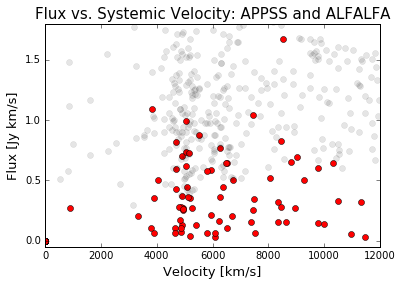

In [29]:
HI = data_alf['usedecdeg'] 
gooddec=(HI >= 33.5) & (HI <= 36.5)
#print(goodHI)

#my slice flux and velocity
#notice how I redefined the velocity
flux_appss=data_appss['Flux']
v1=v_sys

#alfalfa data
flux_alf=data_alf['HIflux']
v2=data_alf['Vhelio']

goodv2=v2[gooddec]
goodflux=flux_alf[gooddec]

#figure of the velocity vs. flux of the appss slice and the alfalfa data
plt.figure()
plt.plot(v1, flux_appss,'ro')
plt.plot(goodv2, goodflux,'ko', alpha=.1) #only near dec 35, +/- 1.5 degrees
plt.title('Flux vs. Systemic Velocity: APPSS and ALFALFA',fontsize=15)
plt.xlabel('Velocity [km/s]',fontsize=13)
plt.ylabel('Flux [Jy km/s]',fontsize=13)
pylab.ylim([-.05,1.8]) #change the range on the y axis
pylab.xlim([0,12000]) #Change the range on the x axis 
fig = plt.gcf()

#fig.savefig('flux_velocity_both.pdf') #uncomment to save a pdf

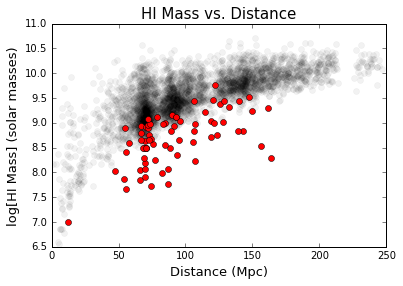

In [30]:
#This isn't the correct way to find the HI mass, but it is useful!
#First, you need to find the distance in Mpc to find HI mass
H_0=70 #km/s/Mpc
D_appss=(good_v_sys)/(H_0) #km

#make sure the values for flux are for velocities greater than zero, because the good_v_sys is greater than zero
good_flux_appss= flux_appss[(v_sys > 0)]

# Calculate HI mass of slice
M_HI_appss = (2.36*10**5)*(D_appss**2)*(good_flux_appss)

#import distance from ALFALFA csv
D_alf=data_alf['Dist']

#Calculate HI mass of ALFALFA catalog
M_HI_alf = (2.36*10**5)*(D_alf**2)*(flux_alf)

#HI mass vs. distance 
plt.figure(1)
plt.plot(D_alf, np.log10(M_HI_alf), 'ko', alpha=.05)
plt.plot(D_appss,np.log10(M_HI_appss),'ro')
plt.title("HI Mass vs. Distance",fontsize=15)
plt.xlabel('Distance (Mpc)',fontsize=13)
plt.ylabel('log[HI Mass] (solar masses)',fontsize=13)
fig1 = plt.gcf()

#fig1.savefig('HI_mass_dist.pdf') 

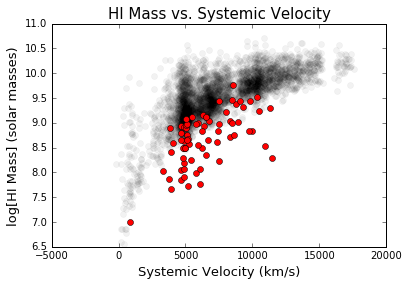

In [31]:
#HI mass vs. systemic velocity
plt.figure(2)
plt.plot(v2,np.log10(M_HI_alf),'ko', alpha=.05)
plt.plot(good_v_sys, np.log10(M_HI_appss), 'ro')
plt.title("HI Mass vs. Systemic Velocity",fontsize=15)
plt.xlabel('Systemic Velocity (km/s)',fontsize=13)
plt.ylabel('log[HI Mass] (solar masses)',fontsize=13)
fig2 = plt.gcf()

#fig2.savefig('HI_mass_vsys.pdf')

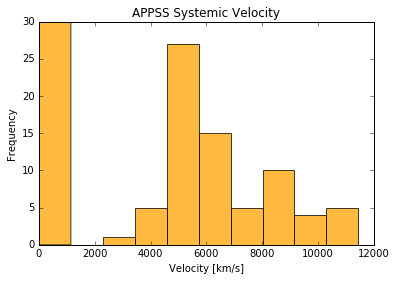

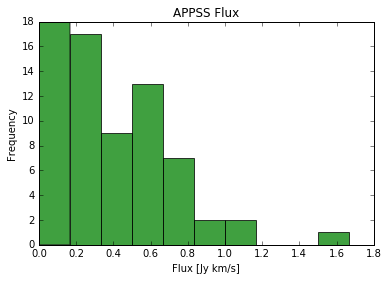

In [12]:
#systemic velocity frequency of just my slice
plt.figure(1)
plt.hist(v1, alpha=.75, facecolor = 'orange', edgecolor= 'black')
plt.title("APPSS Systemic Velocity")
plt.xlabel("Velocity [km/s]")
plt.ylabel("Frequency")
pylab.ylim([0,30]) 

fig1 = plt.gcf()

#fig1.savefig('velocity_APPSS.pdf') 

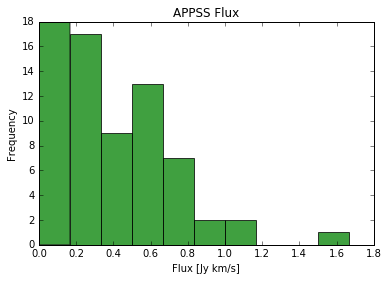

In [32]:
#flux frequency of just my slice 
plt.figure(2)
plt.hist(flux_appss, alpha=.75, facecolor = 'green', edgecolor= 'black')
plt.title("APPSS Flux")
plt.xlabel("Flux [Jy km/s]")
plt.ylabel("Frequency")
pylab.ylim([0,18]) 

fig2 = plt.gcf()

#fig2.savefig('flux_appss.pdf')

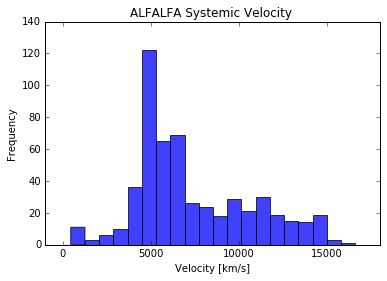

In [13]:
#this histogram is just of the systemic velocity of ALFALFA data in my slice's range
plt.figure()
plt.hist(good_v_alf,bins=20, alpha=.75, facecolor = 'blue', edgecolor= 'black')#=remember good_v_alf was used to define data from ALFALFA that could fit in my slice

pylab.xlim([-1000,18000])

plt.title("ALFALFA Systemic Velocity ")
plt.xlabel("Velocity [km/s]")
plt.ylabel("Frequency")

fig = plt.gcf()

#fig.savefig('velocity_ALF.pdf') #uncomment to save figure

In [14]:
#In case you want to make cuts on other attributes, such as S/N:
#where is the signal to noise ratio greater than 2?
s_n = data_appss['SN']
goodsn=s_n[np.where(s_n > 2.)]
np.size(goodsn)

62

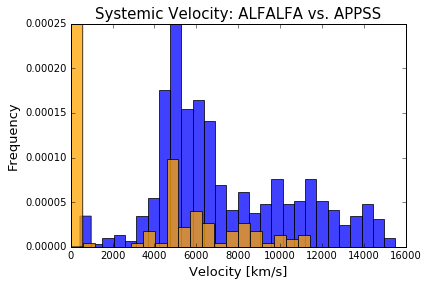

In [15]:
#histogram compares the velocity of my slice data and ALFALFA data in my slice's range
plt.figure()
plt.hist(good_v_alf,bins=30,normed=True,alpha=.75,facecolor='blue',edgecolor='black') #normalizes for fractional values
plt.hist(v1,bins=20,normed=True,alpha=.75,facecolor='orange',edgecolor='black')

plt.title("Systemic Velocity: ALFALFA vs. APPSS", fontsize=15)
plt.xlabel("Velocity [km/s]",fontsize=13)
plt.ylabel("Frequency",fontsize=13)
pylab.xlim([0, 16000])
pylab.ylim([0,.00025]) 

fig = plt.gcf()

#fig.savefig('velocity_both_hist.pdf') #uncomment to save 

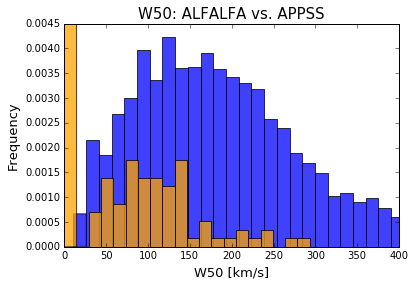

In [16]:
#this compares the w50 of my slice and ALFALFA, however, I did not limit the amount of ALFALFA displayed 
w50_me=data_appss['W50']
w50_alfalfa=data_alf['W50']

plt.figure()

plt.hist(w50_alfalfa, bins=50, alpha =.75, normed = True, facecolor='blue',edgecolor='black')
plt.hist(w50_me, bins=20, normed = True, alpha =.75, facecolor='orange',edgecolor='black')
plt.title("W50: ALFALFA vs. APPSS",fontsize= 15)
plt.xlabel("W50 [km/s]", fontsize = 13)
plt.ylabel("Frequency", fontsize = 13)
pylab.ylim([0,.0045]) 
pylab.xlim([0,400])

fig = plt.gcf()

#fig.savefig('w50_both_hist.pdf')